## Demo 1: assigning formation channels using `formation_channels()` 

In [5]:
#Needed in general
import sys

#Quick fudge to make import from ../Scripts work
sys.path.append('.')

# just to make the screen wider, feel free to comment 
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from formation_channels import *  # downloads the functions to calculate formation channels 

from PostProcessingScripts import * # for some other general functions that I use often, such as plotting functions and names of models
import numpy as np


In [9]:
## change the following lines ## 
BPSmodelName = 'A' # name of the model we want to try
DCOtype = 'BHNS'   # DCO type we want to look into 
pathData = '/Volumes/SimonsFoundation/DataDCO/' # this is the path to my datafiles
#######

path_ = pathData + alphabetDirDict[BPSmodelName] +'/'
path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
fdata = h5.File(path, 'r')

# obtain formation channels 
seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
channels = identify_formation_channels(seeds=seeds, file=fdata)


print(channels) 

[3 1 4 ... 2 2 2]


## Formation Channel Dictionary:
 - 0: *"everything else"* or "other" (by default the code gives a 0, so this means no specific formation channel was assigned. These are often rare formation channels such as "lucky SN kick that brings the stars together; i.e. no mass transfer at all) 
 - 1: *"classic CE channel"*. This is the channel where the events in the formation channel are: (1) stable RLOF from star 1 to star 2 -> (2) SN1 -> (3) unstable (CE) mass transfer from star 2 to compact object 1 (4) SN2 -> (5) merger. Special note: we do require the first mass transfer to *not* be case A mass transfer (i.e. the primary star 1 is *not* on the main sequence during stable RLOF in step (1)) 
 - 2: *only stable mass transfer channel*: same as classic CE channel, but now the second mass transfer is also *stable RLOF* 
 - 3 *immediate single-core CE (as first mass transfer) channel*: channel where the first mass transfer is unstable (Common envelope), but the secondary star (accretor) is still on the main sequence. This is usually the case for more extreme mass ratio systems  (BHNS)
 - 4 *immediate double-core CE (as first mass transfer)channel*: channel where the first mass transfer is unstable (Common envelope), but the secondary star (accretor) is *not* on the main sequence. This is usually the case for equal mass ratio systems  (BNS)
 - 5: *case A classic CE channel:*  same as classic CE channel (1), but only the systems where the first mass transfer *is* case A mass transfer (i.e. the primary star 1 *is* on the main sequence during stable RLOF in step (1)) 
 - 6 *case A only stable RLOF channel*: same as only stable mass transfer channel (2), but only the systems where the first mass transfer *is* case A mass transfer (i.e. the primary star 1 *is* on the main sequence during stable RLOF in step (1)) 
 


## Example: Plot the initial mass ratio and separation for formation channels: 

In [11]:
print(fdata['doubleCompactObjects'].keys())
fdata['doubleCompactObjects']['M1'][...].squeeze()



<KeysViewHDF5 ['M1', 'M1ZAMS', 'M2', 'M2ZAMS', 'Metallicity1', 'doubleCommonEnvelopeFlag', 'eccentricityDCOFormation', 'formaton channel', 'mergesInHubbleTimeFlag', 'optimisticCEFlag', 'seed', 'separationDCOFormation', 'separationInitial', 'stellarType1', 'stellarType2', 'tc', 'tform', 'weight']>


array([ 3.93168, 13.4491 ,  2.20032, ...,  4.06103,  4.023  ,  3.73859])

now at formation channel:  classic
now at formation channel:  stable B no CEE
now at formation channel:  immediate CE
now at formation channel:  double-core CE
now at formation channel:  other


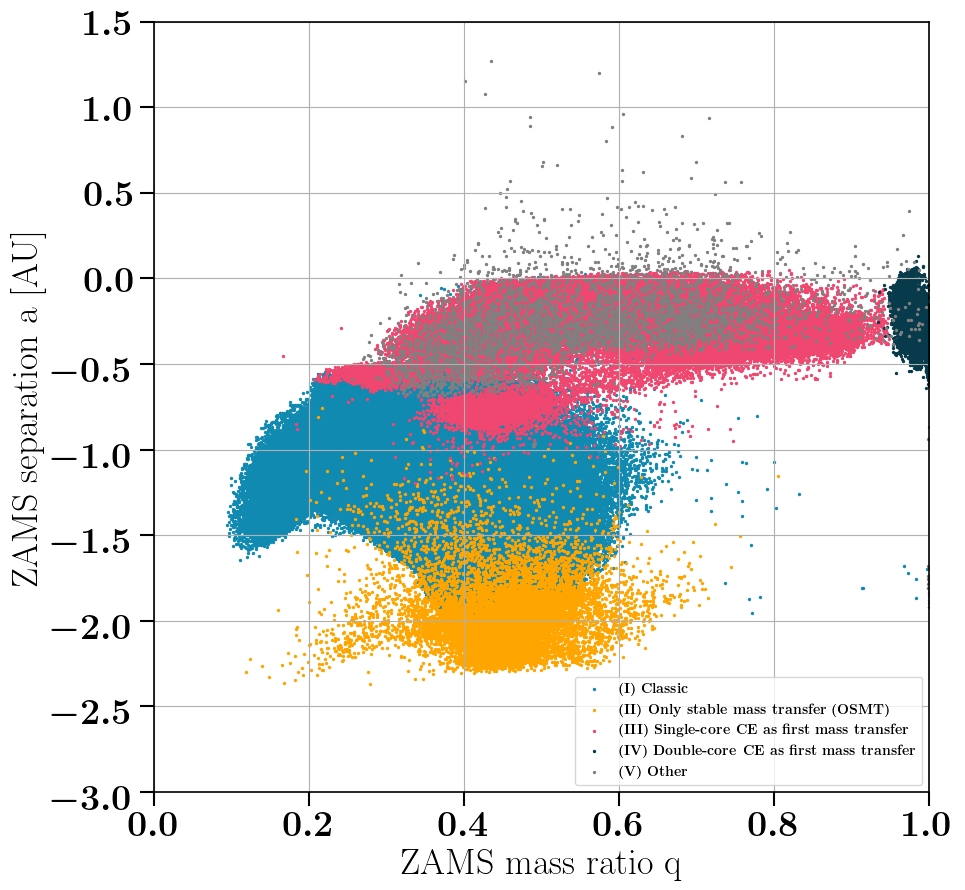

In [29]:


adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other']

# read in mass ratio at ZAMS for DCO binaries 
mass_ratio_ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze() / fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()  # unit less 
separationInitial = fdata['doubleCompactObjects']['separationInitial'][...].squeeze() / fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze() # in AU



fig, axe = plt.subplots(1,1, figsize=(10,10))#,\
# iterate over the channel names 
for nrC, Channel in enumerate(adjustedChannelList): 
        print('now at formation channel: ', Channel)
        ind_wanted = dictFormationChannelIndex[Channel]
        c_FC = channelColorDict[Channel] # color of the channel 
        mask_MRR = (channels==ind_wanted) # get a mask for all the DCO systems that fulfill this criteria 
        
        axe.scatter(mass_ratio_ZAMS[mask_MRR], np.log10(separationInitial)[mask_MRR], c=channelColorDict[Channel], s=2, label=dictChannelsBHNSListBolt[Channel])

        
        
##### make plot look nice: ####
axe = layoutAxes(axe, nameX='ZAMS mass ratio q', nameY='ZAMS separation a [AU]', setMinor=False, labelpad=0, fontsize=26, labelSizeMajor=26)  
axe.set_xlim(0, 1)
axe.set_ylim(-3, 1.5)
axe.grid(True)
plt.legend()
plt.show()